## Binary Classification for transactions

The project aimed to classify instances using decision trees, logistic regression, and XGBoost models with as a target variable the 'transactions' and the other columns for learning the function that maps them to the transaction. Below, you'll find details on the libraries used, usage instructions, model selection rationale, data preparation steps, and evaluation metrics.


# Packages loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics





### <b> LOADING DATA</b>


In [3]:
data = pd.read_csv('Newdata-2.csv')

### <b> Exploratory Data Analysis (EDA)</b>


In [4]:
# General information about the data set
print ("DATA INFO")

print(data.info())

print ("----------")

print("SIZE")
print (data.size)
print ('-----------')

print("SHAPE")
print (data.shape)

print ('----------')
print("DESCRIPTION")
data.describe().transpose()

DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction         12205 non-null  int64  
 1   Customer_Type       12205 non-null  object 
 2   SystemF1            12205 non-null  int64  
 3   SystemF2            12205 non-null  int64  
 4   SystemF3            12205 non-null  int64  
 5   SystemF4            12205 non-null  int64  
 6   SystemF5            12205 non-null  int64  
 7   Account_Page        12205 non-null  int64  
 8   Account_Page_Time   12205 non-null  float64
 9   Info_Page           12205 non-null  int64  
 10  Info_Page_Time      12205 non-null  float64
 11  ProductPage         12205 non-null  int64  
 12  ProductPage_Time    12205 non-null  float64
 13  Month               12205 non-null  int64  
 14  Weekday             12205 non-null  bool   
 15  SpecificHoliday     12205 non-null  float64

,count,mean,std,min,25%,50%,75%,max
Transaction,12205.0,0.156329,0.363182,0.0,0.000000,0.000000,0.000000,1.000000
SystemF1,12205.0,2.124211,0.906823,1.0,2.000000,2.000000,3.000000,8.000000
SystemF2,12205.0,2.357804,1.710114,1.0,2.000000,2.000000,2.000000,13.000000
SystemF3,12205.0,3.153298,2.402340,1.0,1.000000,3.000000,4.000000,9.000000
SystemF4,12205.0,4.073904,4.016654,1.0,2.000000,2.000000,4.000000,20.000000
SystemF5,12205.0,3.003687,1.409130,1.0,2.000000,3.000000,4.000000,5.000000
Account_Page,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Account_Page_Time,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Info_Page,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Info_Page_Time,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000


In [5]:
# Inspection of the unique values for each feature
for column in data.columns:
    unique_values = data[column].unique()
    print("Unique values for column -> {}:".format(column))
    print(unique_values)
    print()

Unique values for column -> Transaction:
[0 1]

Unique values for column -> Customer_Type:
['Returning_Customer' 'New_Customer' 'Other']

Unique values for column -> SystemF1:
[1 2 3 4 8 7 6 5]

Unique values for column -> SystemF2:
[ 2  7  1  5  4  6 10  8  3 13 12 11  9]

Unique values for column -> SystemF3:
[7 3 1 2 4 6 8 5 9]

Unique values for column -> SystemF4:
[10  2  6  1  3  4  5 13  8 20 11  7 18  9 15 14 19 17 12 16]

Unique values for column -> SystemF5:
[2 3 1 4 5]

Unique values for column -> Account_Page:
[ 0 10  2  5  3  6  4  1 12 19  7  8  9 13 11 17 14 15 16 23 18 21 24 22
 20 27 26]

Unique values for column -> Account_Page_Time:
[  0.         147.4583333   33.75       ... 327.4        339.
  86.27777778]

Unique values for column -> Info_Page:
[ 0  4  2  3  1  5  6  7  9 24 10  8 12 14 11 13 16]

Unique values for column -> Info_Page_Time:
[  0.  216.5  45.  ...  62.6 241.   62.4]

Unique values for column -> ProductPage:
[  1  68   6  17  11  33 114   8  13   4 

### <b> DATA PREPROCESSING</b>

In [6]:
# Performing label encoding on categorical variable (Customer_Type) in order to convert them into numerical features
le = LabelEncoder()

data['Customer_Type'] = le.fit_transform(data['Customer_Type'])

# Convertion of the only boolean variable into numerical with the same way
data['Weekday'] = le.fit_transform(data['Weekday'])


In [7]:
# Checking the data after the procedure of transformation
data.info()
# Both Customer Type and Weekdays are in the preferable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction         12205 non-null  int64  
 1   Customer_Type       12205 non-null  int32  
 2   SystemF1            12205 non-null  int64  
 3   SystemF2            12205 non-null  int64  
 4   SystemF3            12205 non-null  int64  
 5   SystemF4            12205 non-null  int64  
 6   SystemF5            12205 non-null  int64  
 7   Account_Page        12205 non-null  int64  
 8   Account_Page_Time   12205 non-null  float64
 9   Info_Page           12205 non-null  int64  
 10  Info_Page_Time      12205 non-null  float64
 11  ProductPage         12205 non-null  int64  
 12  ProductPage_Time    12205 non-null  float64
 13  Month               12205 non-null  int64  
 14  Weekday             12205 non-null  int64  
 15  SpecificHoliday     12205 non-null  float64
 16  Goog

*For better understanding of the data we proceed to create a boxplot and a histogram for each variable.*

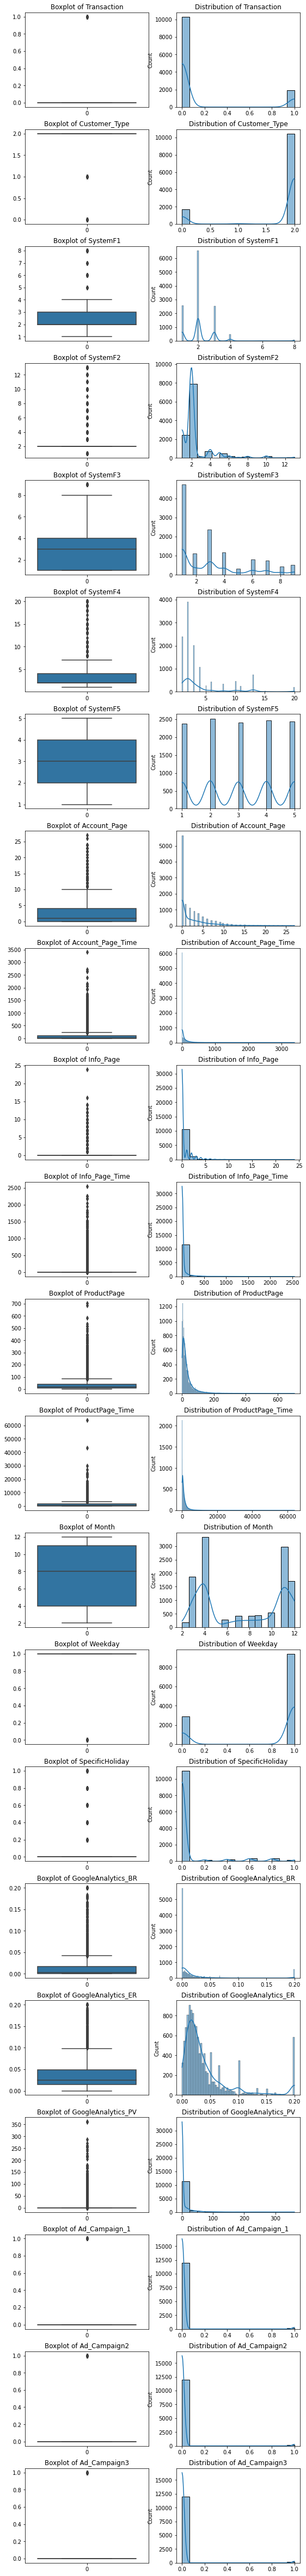

In [8]:
# Figure size and layout
fig, axes = plt.subplots(nrows=22, ncols=2, figsize=(8, 3 * len(data.columns)))
fig.tight_layout(pad=2.0)


for index, column in enumerate(data):
    # Plot boxplot
    sns.boxplot(data=data[column], ax=axes[index, 0])
    axes[index, 0].set_title(f"Boxplot of {column}")
    axes[index, 0].set_xlabel("")

    # Plot distribution
    sns.histplot(data=data, x=column, kde=True, ax=axes[index, 1])
    axes[index, 1].set_title(f"Distribution of {column}")
    axes[index, 1].set_xlabel("")

# Save the figure as a JPEG image
plt.savefig('Boxplot_Histogram.jpg')
# Interpret of graphs
plt.show()




#### <b> Correlation Matrix intrepreted using Heatmap to detect the correlation between the features and the target variable</b>

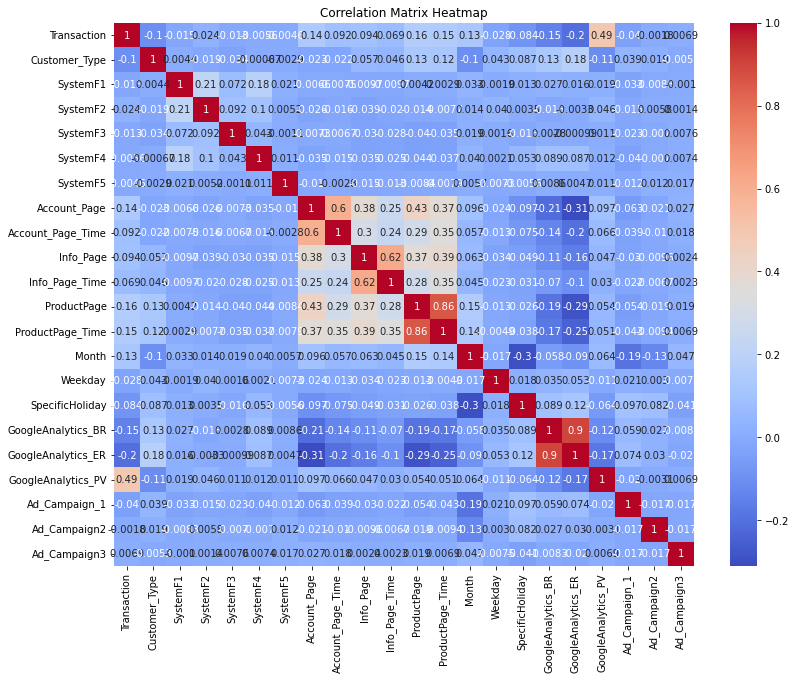

In [9]:
# Separation the target column
target_col = 'Transaction'


# Calculate the correlation matrix for thee encoded_data
correlation_matrix = data.corr(method='pearson')  # we choose Pearson, as it is the default parameter of the corr function

# Create a heatmap of the correlation matrix
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
# Save the figure as a JPEG image
plt.savefig('Correlation_Heatmap.jpg')
plt.show()

From above histograms and boxplots it is obvious that the Google_Analytics_PV has a lot of outliers.
Proceeding to implemention of Z-score to reduce this problem, as the future importance at the last stage of the code showed that it is the most important feature

In [10]:
z_scores = np.abs((data['GoogleAnalytics_PV'] - data['GoogleAnalytics_PV'].mean()) / data['GoogleAnalytics_PV'].std())
data.loc[z_scores > 3, 'GoogleAnalytics_PV'] = 2

Over sampling method for the target variable (manual way)

In [11]:
X_ones= data[data['Transaction'] == 1]
X_zeroes = data[data['Transaction'] == 0]
X_zeroes = X_zeroes.sample(n=1908, random_state=42)
X = pd.concat([X_ones, X_zeroes], axis=0)


In [12]:
# Splitting the data into Target and Features
y = X['Transaction']

X = X.drop('Transaction',axis=1)

*Checking the distribution of the target variable*


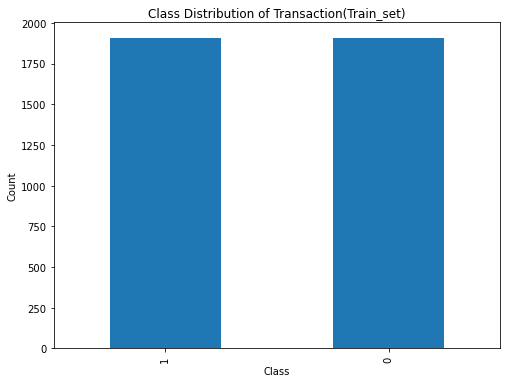


Class proportions:
1    0.5
0    0.5
Name: Transaction, dtype: float64


In [13]:

target_counts = y.value_counts()


# Plot the class distribution
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution of Transaction(Train_set)')
# Save the figure as a JPEG image
plt.savefig('Transaction_distribution.jpg')
plt.show()

# Compute class proportions
class_proportions = target_counts / target_counts.sum()
print("\nClass proportions:")
print(class_proportions)


*   Split the data into train and test sets
*   The test_size parameter is set to 0.2, indicating that 20 % of the data will go for the test set (80% for train set)

*   The random_state parameter is set to 42 to ensure reproducibility of the splits
*   The stratify parameter is set to y, which ensures that the class distribution in the original dataset is preserved in all three sets (training, validation, and test)


In [14]:
# Splitting data to Train set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting Train set to Train set and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## BASE LINE MODEL XGBOOST

In [15]:
# Create an instance of the XGBoost Classifier model
model_xgb = xgb.XGBClassifier( )

# Fit the model on the training data
model_xgb.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_XGB_Base = model_xgb.predict(X_val)


# Calculating the performance scores of the model on the validation set
precision = precision_score(y_val, y_val_pred_XGB_Base)
recall = recall_score(y_val, y_val_pred_XGB_Base)
f1 = f1_score(y_val, y_val_pred_XGB_Base)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))


Precision: 81.75%
Recall: 85.03%
F1 Score: 83.36%


Interpreting the confusion matrix for the XGBoost baseline model

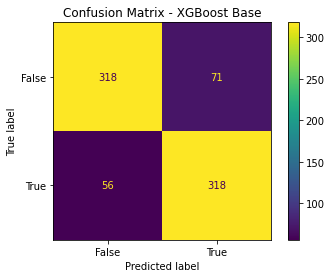

In [16]:
confusion_matrix = metrics.confusion_matrix(y_val, y_val_pred_XGB_Base)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Confusion Matrix - XGBoost Base')
# Save the figure as a JPEG image
plt.savefig('Con_matrix_XGB_base.jpg')
plt.show()

## XGBOOST HYPER-PARAMETER TUNNING

In [17]:
# Definition of the objective function that will be used to be minimized by Optuna
def objective(trial):
    # Definition of the parameters that will be checked and their range
    params ={
        'n_estimators': trial.suggest_int('n_estimators', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10),
    }

    # Create the XGBoost classifier with the specified parameters
    model_xgb_tunned = xgb.XGBClassifier(**params)

    # Train the model
    model_xgb_tunned.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model_xgb_tunned.predict(X_val)

    # Calculate F1 score
    f1 = f1_score(y_val, y_pred)

    return f1

# Create an Optuna study and optimize the objective function created above
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the corresponding F1 score
best_params = study.best_params
best_f1_score = study.best_value

print("Best Hyperparameters:")
print(best_params)
print("Best F1 Score:", best_f1_score)

[I 2023-06-20 02:45:27,421] A new study created in memory with name: no-name-5f8c277a-a85a-4a6a-8124-92a3467525de
[I 2023-06-20 02:45:27,625] Trial 0 finished with value: 0.84 and parameters: {'n_estimators': 139, 'max_depth': 5, 'learning_rate': 0.030118669301966893, 'subsample': 0.6273948030873436, 'colsample_bytree': 0.7972211574504607, 'gamma': 0.5485052304016924, 'reg_alpha': 1.5254606609830088, 'reg_lambda': 0.755619705332291}. Best is trial 0 with value: 0.84.
[I 2023-06-20 02:45:27,697] Trial 1 finished with value: 0.8387096774193549 and parameters: {'n_estimators': 62, 'max_depth': 3, 'learning_rate': 0.02264382945868859, 'subsample': 0.880924956711868, 'colsample_bytree': 0.61904146856693, 'gamma': 0.9174370423742053, 'reg_alpha': 6.818345025920456, 'reg_lambda': 6.915359328520974}. Best is trial 0 with value: 0.84.
[I 2023-06-20 02:45:27,952] Trial 2 finished with value: 0.8454425363276089 and parameters: {'n_estimators': 155, 'max_depth': 9, 'learning_rate': 0.1070213344511

Best Hyperparameters:
{'n_estimators': 139, 'max_depth': 13, 'learning_rate': 0.1309377687699666, 'subsample': 0.572755986076576, 'colsample_bytree': 0.6958935064305112, 'gamma': 0.24929676281273142, 'reg_alpha': 0.3782823022998739, 'reg_lambda': 2.7692003684614868}
Best F1 Score: 0.8563829787234042


we fit the model again but with concat now
Using the optimal parameters found by optuna to fit the model again but on the Train + Validation set in order to imporve generalization

In [18]:
final_model_xgb= xgb.XGBClassifier(**best_params)

# Combine the training and validation sets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Train the model on the combined training + validation set
final_model_xgb.fit(X_train_val, y_train_val)

# Predict on the test set
y_pred_test_XGB_TUNNED = final_model_xgb.predict(X_test)

# Calculate performance metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test_XGB_TUNNED)
precision_test = precision_score(y_test, y_pred_test_XGB_TUNNED)
recall_test = recall_score(y_test, y_pred_test_XGB_TUNNED)
f1_score_test = f1_score(y_test, y_pred_test_XGB_TUNNED)

# Print the evaluation metrics
print("Test Set Metrics:")
print("Accuracy: {:.2f}%".format(accuracy_test * 100))
print("Precision: {:.2f}%".format(precision_test * 100))
print("Recall: {:.2f}%".format(recall_test * 100))
print("F1 Score: {:.2f}%".format(f1_score_test * 100))

Test Set Metrics:
Accuracy: 82.98%
Precision: 81.75%
Recall: 85.93%
F1 Score: 83.79%


Interpreting the confusion matrix for the XGBoost final model( after tunning and Train + Validation set)**bold text**

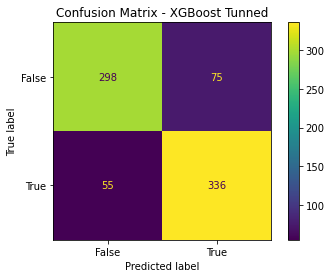

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_XGB_TUNNED)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Confusion Matrix - XGBoost Tunned')
# Save the figure as a JPEG image
plt.savefig('Con_matrix_XGB_Tunned.jpg')
plt.show()

Last step of the XGBoost model is to calculate the performance scores based on 5 - fold validation to understand it's behavior on generalization

In [20]:
# Define the scoring metrics that will be used in the 5 - fold validaiton
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Calculate cross-validation scores for each metric
precision_scores = cross_val_score(final_model_xgb, X_test, y_test, cv=5, scoring='precision')
recall_scores = cross_val_score(final_model_xgb, X_test, y_test, cv=5, scoring='recall')
f1_scores = cross_val_score(final_model_xgb, X_test, y_test, cv=5, scoring='f1')

# Calculate average scores
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()
avg_f1 = f1_scores.mean()

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)

Average Precision: 0.8354457504520797
Average Recall: 0.8133398247322298
Average F1 Score: 0.8238340574400386


#### ** DECISION TREES BASELINE MODEL **



In [21]:
# Create an instance of the Decission Tree Classifier model
DT_baseline_model = DecisionTreeClassifier(random_state=42)

#Fit the model to the training data
DT_baseline_model.fit(X_train, y_train)

#We predict on validation set
y_pred_base_DT = DT_baseline_model.predict(X_val)

#Evaluate the baseline model's performance
precision = precision_score(y_val, y_pred_base_DT)
recall = recall_score(y_val, y_pred_base_DT)
f1 = f1_score(y_val, y_pred_base_DT)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))


Precision: 77.49%
Recall: 79.14%
F1 Score: 78.31%


Interpreting the confusion matrix for the Decission Tree base model

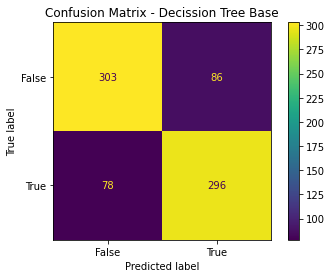

In [22]:
#confussion matrix dec trees

confusion_matrix = metrics.confusion_matrix(y_val, y_pred_base_DT)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Confusion Matrix - Decission Tree Base')
# Save the figure as a JPEG image
plt.savefig('Con_matrix_DT_base.jpg')
plt.show()

####**LOGISTIC REGRESSION BASELINE MODEL**


In [23]:
# Create an instance of the Logistic Regression model
logreg_model = LogisticRegression(random_state=42  , solver='liblinear')

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on validation set
y_pred_base_LR = logreg_model.predict(X_val)

# Evaluate the baseline model's performance
precision = precision_score(y_val, y_pred_base_LR)
recall = recall_score(y_val, y_pred_base_LR)
f1 = f1_score(y_val, y_pred_base_LR)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))



Precision: 83.01%
Recall: 69.25%
F1 Score: 75.51%


Interpreting the confusion matrix for the Logistic Regression base model

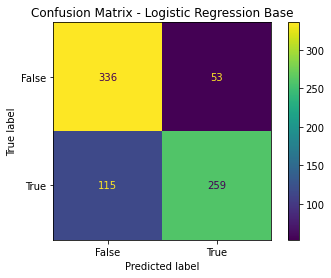

In [24]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred_base_LR)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Confusion Matrix - Logistic Regression Base')
# Save the figure as a JPEG image
plt.savefig('Con_matrix_LG_base.jpg')
plt.show()

## LOGISTIC REGRESSION BOOSTING

In [25]:

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 5.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [40, 70, 100]}


# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)




C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarn

Best Hyperparameters: {'C': 0.01, 'max_iter': 40, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7802528355613314


C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Spiretos\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
# Train the model with the best hyperparameters on the entire training set
model_lg_tunned = LogisticRegression(**best_params)
model_lg_tunned.fit(X_val, y_val)

# Evaluate the model on the test set
y_pred_LG_BOOST = model_lg_tunned.predict(X_test)


# Define the scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Calculate cross-validation scores for each metric
precision_scores = cross_val_score(model_lg_tunned, X_test, y_test, cv=5, scoring='precision')
recall_scores = cross_val_score(model_lg_tunned, X_test, y_test, cv=5, scoring='recall')
f1_scores = cross_val_score(model_lg_tunned, X_test, y_test, cv=5, scoring='f1')

# Calculate average scores
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()
avg_f1 = f1_scores.mean()

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Precision: 0.8301773490892075
Average Recall: 0.7314832846478415
Average F1 Score: 0.776923141186299


Interpreting the confusion matrix for the Logistic Regression final model( after tunning and Train + Validation set)**bold text**

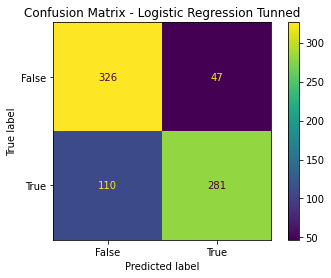

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_LG_BOOST)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Confusion Matrix - Logistic Regression Tunned')
# Save the figure as a JPEG image
plt.savefig('Con_matrix_LG_Tunned.jpg')
plt.show()

Implementing 5- Validation and checking the performance

In [28]:

# Train the model on the combined training and validation sets
model_lg_tunned.fit(X_train_val, y_train_val)

# Predict on the test set
y_pred_test_lg_concat = model_lg_tunned.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test_lg_concat)
precision_test = precision_score(y_test, y_pred_test_lg_concat)
recall_test = recall_score(y_test, y_pred_test_lg_concat)
f1_score_test = f1_score(y_test, y_pred_test_lg_concat)

# Print the evaluation metrics
print("Test Set Metrics:")
print("Accuracy: {:.2f}%".format(accuracy_test * 100))
print("Precision: {:.2f}%".format(precision_test * 100))
print("Recall: {:.2f}%".format(recall_test * 100))
print("F1 Score: {:.2f}%".format(f1_score_test * 100))

Test Set Metrics:
Accuracy: 79.84%
Precision: 84.96%
Recall: 73.66%
F1 Score: 78.90%


__REPORTS A SUMMARY OF THE MODEL'S PERFORMANCES FOR ITS MODEL__

In [29]:
print ('BASELINE MODELS')

print ('BASELINE DECISION TREE BOOST REPORT')
print()
report_base_DT = classification_report(y_val, y_pred_base_DT)
print (report_base_DT)

print()
print ('BASELINE XGD BOOST REPORT')
report_base_xgd = classification_report(y_val, y_val_pred_XGB_Base)
print (report_base_xgd)

print()
print('BASELINE LOGISTIC REGRESSION REPORT')
report_base_LR = classification_report(y_val , y_pred_base_LR)
print (report_base_LR)

print()
print('LOGISTIC REGRESSION BOOST REPORT')
report_base_LR = classification_report(y_test , y_pred_LG_BOOST)
print (report_base_LR)



print ()
print ('TUNING XG BOOST REPORT')
report_tuning_xgb = classification_report(y_test , y_pred_test_XGB_TUNNED)
print(report_tuning_xgb)



BASELINE MODELS
BASELINE DECISION TREE BOOST REPORT

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       389
           1       0.77      0.79      0.78       374

    accuracy                           0.79       763
   macro avg       0.79      0.79      0.79       763
weighted avg       0.79      0.79      0.79       763


BASELINE XGD BOOST REPORT
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       389
           1       0.82      0.85      0.83       374

    accuracy                           0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763


BASELINE LOGISTIC REGRESSION REPORT
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       389
           1       0.83      0.69      0.76       374

    accuracy                           0.78       763
   macro av

Interpreration of the future importance based on the XGBoost Classifier after Tunning

In [30]:
# Get the feature importances
importances = final_model_xgb.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

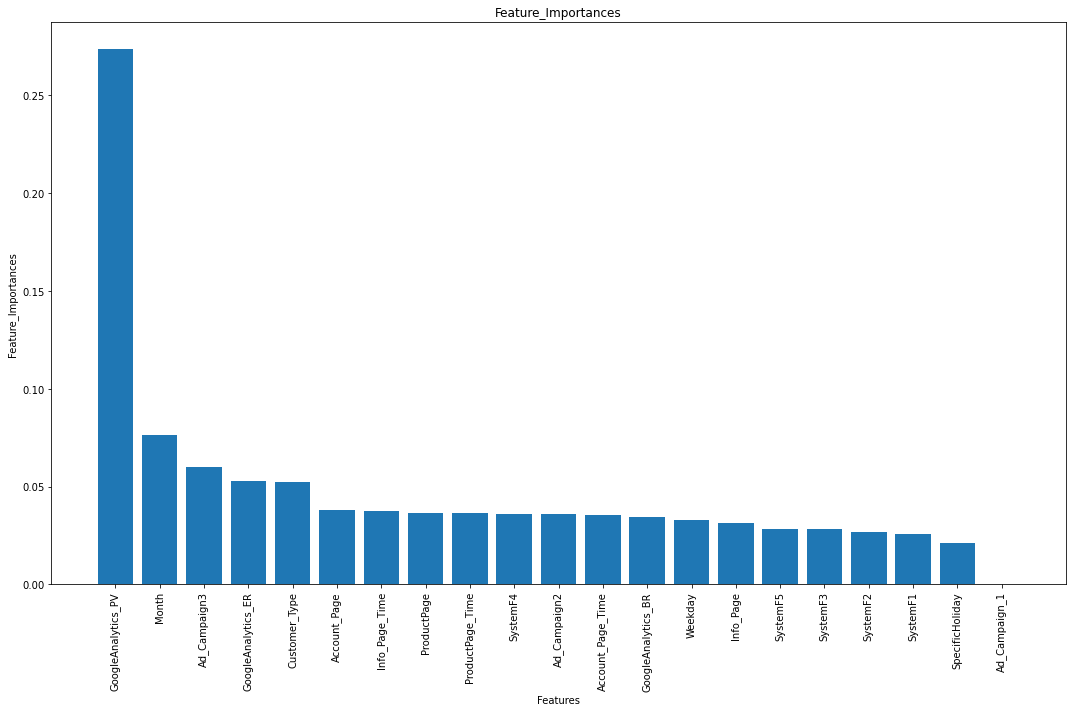

In [31]:
plt.figure(figsize=(15, 10))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Feature_Importances')
plt.xticks(rotation=90)
plt.title('Feature_Importances')
plt.tight_layout()
# Save the figure as a JPEG image
plt.savefig('Feature_importance.jpg')
plt.show()